In [58]:
import pandas as pd
import csv
import time
import requests
import imdb
import numpy as np

import requests
import urllib
import imdb
import lxml.html
import itertools
%matplotlib inline
import seaborn as sns
import math
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
full_df = pd.read_csv("full-movies-merged.csv")
print(full_df.shape)
full_df.head()

(6354, 15)


,genre_ids,title,poster_path,tmdb_id,popularity,keywords,vote_count,vote_average,director,imdb_votes,certificate,num_stunts,num_fx,year,month
0,"[28, 53, 878, 9648]",Minority Report,/h3lpltSn7Rj1eYTPQO1lYGdw4Bz.jpg,180,4.023489,"self-fulfilling prophecy,evidence,hologram,dys...",2035,7.0,Steven Spielberg,418905.0,12,88.0,49.0,2002,6
1,"[12, 53, 878]",War of the Worlds,/xXMM9KY2eq1SDOQif9zO91YOBA8.jpg,74,4.022906,"post traumatic stress disorder,new jersey,air...",1690,6.1,Steven Spielberg,349381.0,12A,94.0,90.0,2005,6
2,"[878, 18]",Close Encounters of the Third Kind,/mABOVIUl5lB0WF4HG28rfamgxG1.jpg,840,4.018199,"indiana,obsession,extraterrestrial technology,...",849,7.2,Steven Spielberg,146265.0,TV-MA,10.0,8.0,1977,11
3,"[12, 18, 53]",127 Hours,/c6Nu7UjhGCQtV16WXabqOQfikK6.jpg,44115,4.017993,"mountains,despair,adventure,utah,alone,canyon,...",2067,6.9,Danny Boyle,292099.0,15,11.0,6.0,2010,11
4,[27],Ouija,/vHTXN00kJktCbSLV50Vbk9siNiX.jpg,242512,4.014788,"death of a friend,swimming pool,ouija,ouija bo...",726,4.9,Stiles White,37043.0,15,20.0,4.0,2014,10


In [4]:
def requestResults(url):
    r = requests.get(BASE_URL + url + "&api_key=" + API_KEY)
    return r.json()

# Constants
BASE_URL = "https://api.themoviedb.org/3/"
API_KEY = "9767d17413ec9d9729c2cca238df02da"
GENRE_MAP = {}
for g in requestResults("genre/movie/list?x=1")[u'genres']:
    GENRE_MAP[g['id']] = g['name']

In [5]:
GENRE_MAP

{12: u'Adventure',
 14: u'Fantasy',
 16: u'Animation',
 18: u'Drama',
 27: u'Horror',
 28: u'Action',
 35: u'Comedy',
 36: u'History',
 37: u'Western',
 53: u'Thriller',
 80: u'Crime',
 99: u'Documentary',
 878: u'Science Fiction',
 9648: u'Mystery',
 10402: u'Music',
 10749: u'Romance',
 10751: u'Family',
 10752: u'War',
 10770: u'TV Movie'}

In [10]:
str(GENRE_MAP.values()[1])

'Crime'

War, history  2
Crime, thriller, mystery, Drama  4
Fantasy,  1
Family, animation  2
Romance, Music    2
Science fiction, action, adventure   3
Comedy 1

In [12]:
def _mapGidsToGenres(genre_ids):
    return [str(GENRE_MAP[gid]) for gid in genre_ids]

In [46]:
num_row = len(full_df)
genres_summary = {}
for row in range(num_row):
    genres_id = full_df['genre_ids'][row][1:-1].split(",")
    genres_list = []
    for i in genres_id:
        genres_list.append(int(i))
    genres_name = _mapGidsToGenres(genres_list)
    print(genres_name)
    for name in genres_name:
        if name not in genres_summary:
            genres_summary[name] = 1
        else:
            genres_summary[name] += 1
   

['Action', 'Thriller', 'Science Fiction', 'Mystery']
['Adventure', 'Thriller', 'Science Fiction']
['Science Fiction', 'Drama']
['Adventure', 'Drama', 'Thriller']
['Horror']
['Drama', 'Science Fiction', 'Mystery']
['Action', 'Adventure', 'Drama', 'Thriller']
['Adventure', 'Fantasy', 'Drama']
['Drama', 'Romance']
['Comedy', 'Fantasy', 'Science Fiction']
['Drama', 'Crime']
['Action', 'Crime']
['Drama']
['Action', 'Thriller', 'Crime']
['Action', 'Comedy', 'Science Fiction']
['Action', 'Thriller', 'Adventure']
['War', 'Action']
['Action', 'Science Fiction']
['Action', 'Thriller', 'Adventure']
['Horror', 'Action', 'Science Fiction']
['Adventure', 'Fantasy']
['Comedy', 'Romance']
['Adventure', 'Fantasy', 'Drama', 'Romance']
['Action', 'Comedy']
['Romance', 'Comedy', 'Crime', 'Fantasy']
['Horror', 'Thriller', 'Science Fiction']
['Drama', 'Crime']
['Adventure', 'Action', 'Science Fiction']
['Drama', 'Horror', 'Thriller']
['Science Fiction', 'Action', 'Horror']
['Drama']
['Action', 'Adventure', 

KeyError: 10769

In [47]:
genres_summary

{'Action': 1030,
 'Adventure': 577,
 'Animation': 31,
 'Comedy': 1173,
 'Crime': 654,
 'Documentary': 3,
 'Drama': 1599,
 'Family': 251,
 'Fantasy': 332,
 'History': 129,
 'Horror': 551,
 'Music': 87,
 'Mystery': 336,
 'Romance': 572,
 'Science Fiction': 445,
 'TV Movie': 18,
 'Thriller': 1254,
 'War': 128,
 'Western': 96}

In [64]:
import operator
sorted(genres_summary.items(), key=operator.itemgetter(1))

[('Documentary', 3),
 ('TV Movie', 18),
 ('Animation', 31),
 ('Music', 87),
 ('Western', 96),
 ('War', 128),
 ('History', 129),
 ('Family', 251),
 ('Fantasy', 332),
 ('Mystery', 336),
 ('Science Fiction', 445),
 ('Horror', 551),
 ('Romance', 572),
 ('Adventure', 577),
 ('Crime', 654),
 ('Action', 1030),
 ('Comedy', 1173),
 ('Thriller', 1254),
 ('Drama', 1599)]

In [56]:
genres_summary.keys()

['Mystery',
 'Romance',
 'History',
 'Family',
 'Fantasy',
 'Horror',
 'Crime',
 'Drama',
 'Science Fiction',
 'Animation',
 'Music',
 'Adventure',
 'Action',
 'TV Movie',
 'Comedy',
 'Documentary',
 'War',
 'Thriller',
 'Western']

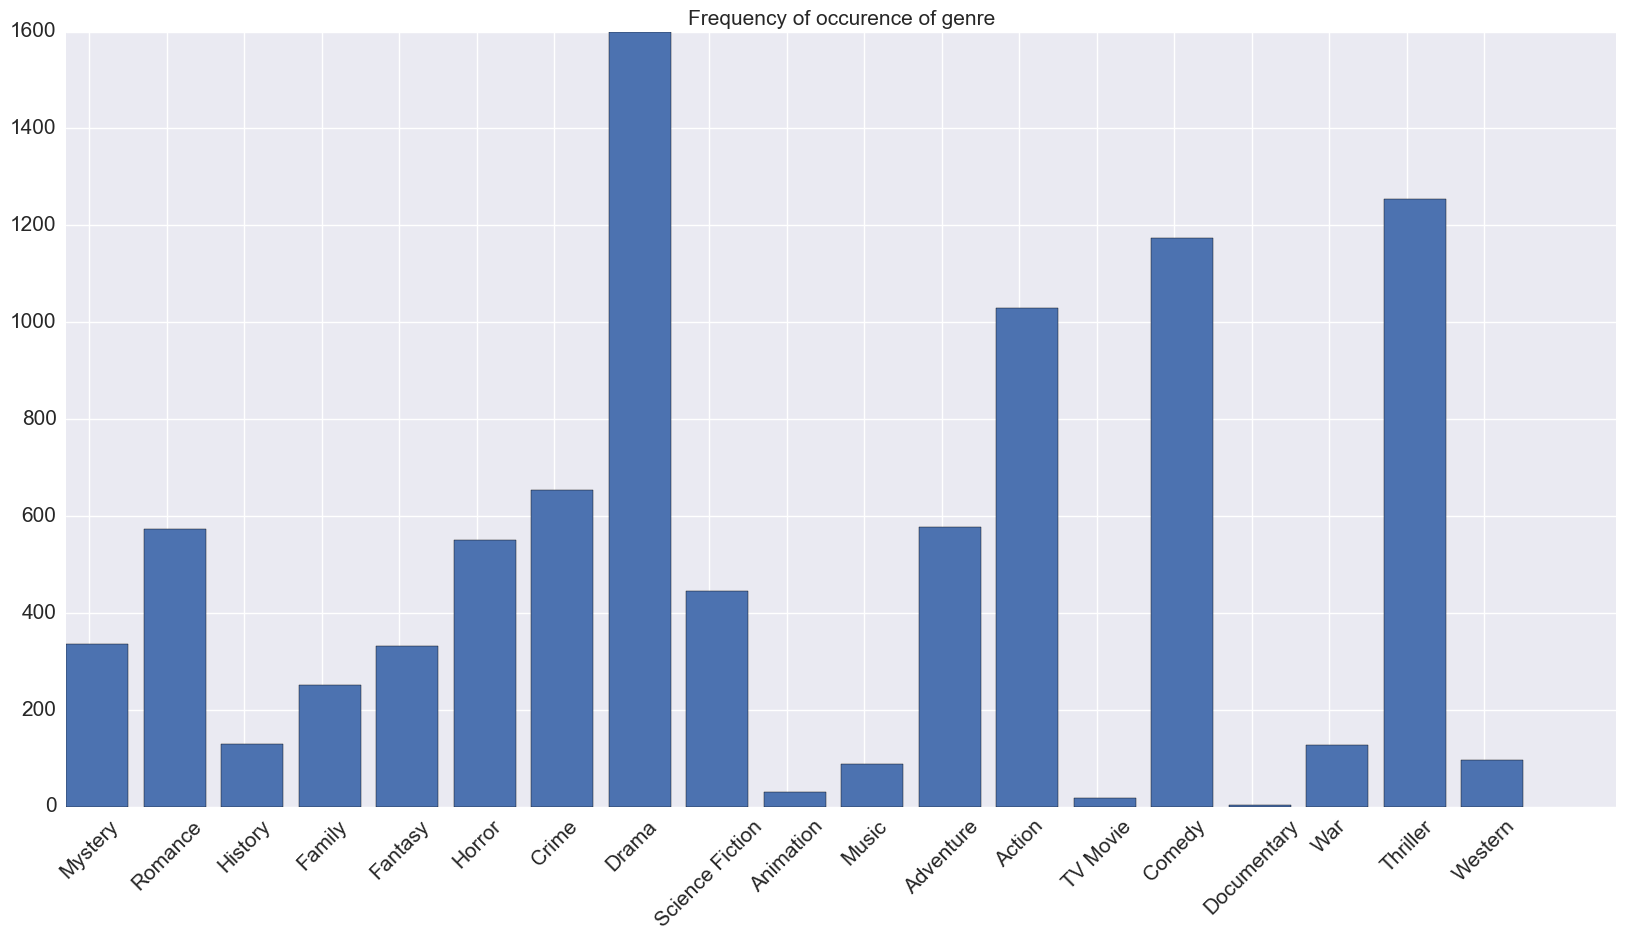

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
num_unique_genres = len(genres_summary)
ax.bar(range(num_unique_genres), genres_summary.values())
ax.set_xticks(np.arange(num_unique_genres)+0.3)
ax.set_xticklabels(genres_summary.keys(), rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Frequency of occurence of genre', fontsize=15)
plt.show()

War, history  2
Crime, thriller, mystery, Drama  4
Fantasy,  1
Family, animation  2
Romance, Music    2
Science fiction, action, adventure   3
Comedy 1
##################

Crime, thriller, mystery, Drama, War, history 6
Family, animation,Comedy 3
Romance, Music    2
Science fiction, action, adventure,Fantasy 4

In [62]:
genres_summary["Crime"]+genres_summary["Mystery"]+genres_summary["Thriller"]+genres_summary["Drama"] + genres_summary["War"]+genres_summary["History"]

4100

In [61]:
genres_summary["Family"]+genres_summary["Animation"]+genres_summary["Comedy"]

1455

In [52]:
genres_summary["Romance"]+genres_summary["Music"]

659

In [60]:
genres_summary["Science Fiction"]+genres_summary["Action"]+genres_summary["Adventure"]+genres_summary["Fantasy"]

2384

In [ ]:
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
# df.sample(frac=0.1, replace=True)
# Returns a random sample of items from an axis of object.

import pandas
import random
df = pandas.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
rows = random.sample(df.index, 10)
df_10 = df.ix[rows]
df_90 = df.drop(rows)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

In [ ]:
War, history  2
Crime, thriller, mystery, Drama  4
Fantasy,  1
Family, animation  2
Romance, Music    2
Science fiction, action, adventure   3
Comedy 1

In [72]:
combine_genres7 = {}

In [73]:
c1 = genres_summary["War"]+genres_summary["History"]
combine_genres7["war_history"] = c1

In [74]:
c2 = genres_summary["Crime"]+genres_summary["Mystery"]+genres_summary["Thriller"]+genres_summary["Drama"]
combine_genres7["crime_mystry_thriller"] = c2

In [75]:
c3 = genres_summary["Fantasy"]
combine_genres7["fantasy"] = c3

In [76]:
c4 = genres_summary["Family"]+genres_summary["Animation"]
combine_genres7["family_animation"] = c4

In [77]:
c5 = genres_summary["Romance"]+genres_summary["Music"]
combine_genres7["romance_music"] = c5

In [78]:
c6 = genres_summary["Science Fiction"]+genres_summary["Action"]+genres_summary["Adventure"]
combine_genres7["fiction_action_adventure"] = c6

In [79]:
c7 = genres_summary["Comedy"]
combine_genres7["Comedy"] = c7

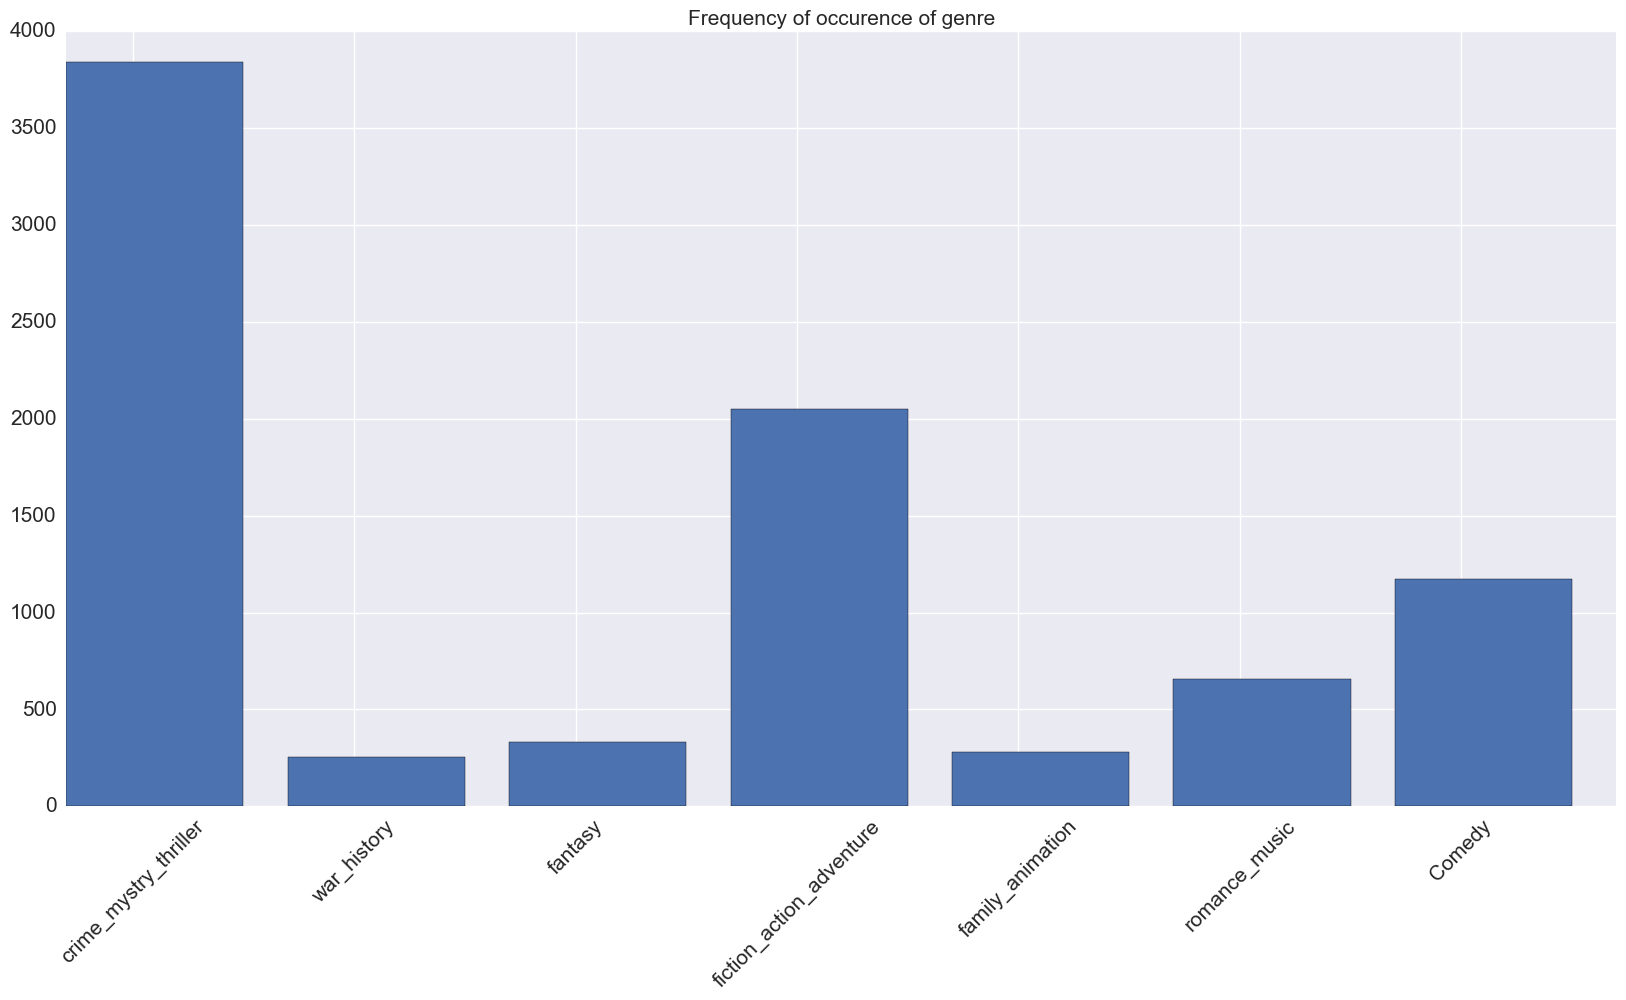

In [81]:
dict_movie_frequency = combine_genres7

fig, ax = plt.subplots(figsize=(20, 10))
num_unique_genres = len(dict_movie_frequency)
ax.bar(range(num_unique_genres), dict_movie_frequency.values())
ax.set_xticks(np.arange(num_unique_genres)+0.3)
ax.set_xticklabels(dict_movie_frequency.keys(), rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Frequency of occurence of genre', fontsize=15)
plt.show()